# Testing the flags model

This notebook demonstrates Python code for classify images using your trained Visual Recognition model.


- Step 1: Install and import required libraries
- Step 2: Look up Visual Recognition API key and trained model id
- Step 3: View test images
- Step 4: Classify the test images

## Step 1: Install and import required libraries

- watson_developer_cloud for working with [Watson Visual Recognition API](https://cloud.ibm.com/apidocs/visual-recognition?code=python)

In [ ]:
!pip install --upgrade watson-developer-cloud

## Step 2: Look up Visual Recognition API key and trained model id

1. From the **Services** menu in Watson Studio, right-click "Watson Services" and then open the link in a new browser tab
2. In the new Watson services tab, click the service instance in the Visual Recognition list
3. In the **Overview** tab, scroll down to the list of your custom models and then click "Copy model ID"
4. In the **Credentials** tab, expand credentials and then copy the apikey

In [1]:
model_id = '' # <-- PASTE YOUR MODEL ID HERE
apikey   = '' # <-- PASTE YOUR APIKEY HERE

## Step 3: View test images

Sample images of flags for testing your trained model.

In [6]:
url_1 = 'https://github.com/IBMDataScience/Watson-Studio-Examples/raw/master/Play-national-anthem-flags/flags-model/test_images/heart-flag-canada.jpg'
url_2 = 'https://github.com/IBMDataScience/Watson-Studio-Examples/raw/master/Play-national-anthem-flags/flags-model/test_images/torn-american-flag.jpg'

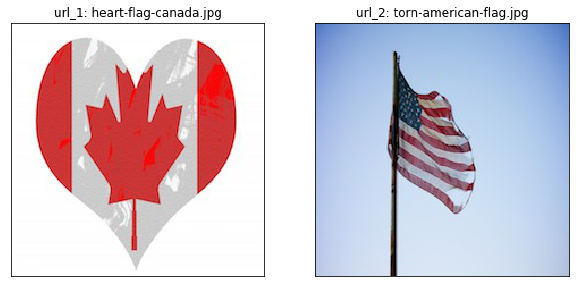

In [7]:
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 1, 2, figsize=( 10, 5 ) )
axs[0].imshow( io.imread(url_1) )
axs[1].imshow( io.imread(url_2) )
axs[0].set_title( 'url_1: ' + re.sub( '.*\/', '', url_1 ) )
axs[1].set_title( 'url_2: ' + re.sub( '.*\/', '', url_2 ) )
for img in axs:
    img.set_xticks([])
    img.set_yticks([])


## Step 4: Classify the test images

In [8]:
# Instantiate a visual recognition object
#
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

In [9]:
# Classify the test images
#
# *Change the url parameter from url_1 to url_2 to test the different sample images
#
import json
results = visual_recognition.classify( url=url_1, threshold='0', classifier_ids=model_id ).get_result()
print( json.dumps( results, indent=2 ) )

{
  "custom_classes": 2,
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "Flags_1625486433",
          "name": "Flags",
          "classes": [
            {
              "score": 0.92,
              "class": "Canada"
            },
            {
              "score": 0.005,
              "class": "USA"
            }
          ]
        }
      ],
      "resolved_url": "https://raw.githubusercontent.com/IBMDataScience/Watson-Studio-Examples/master/Play-national-anthem-flags/flags-model/test_images/heart-flag-canada.jpg",
      "source_url": "https://github.com/IBMDataScience/Watson-Studio-Examples/raw/master/Play-national-anthem-flags/flags-model/test_images/heart-flag-canada.jpg"
    }
  ],
  "images_processed": 1
}


Copyright © 2018 IBM. This notebook and its source code are released under the terms of the MIT License.